<a href="https://colab.research.google.com/github/Monika1109-lang/codsoft/blob/main/iris_dataset_ipynb_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Description of dataset
<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145        

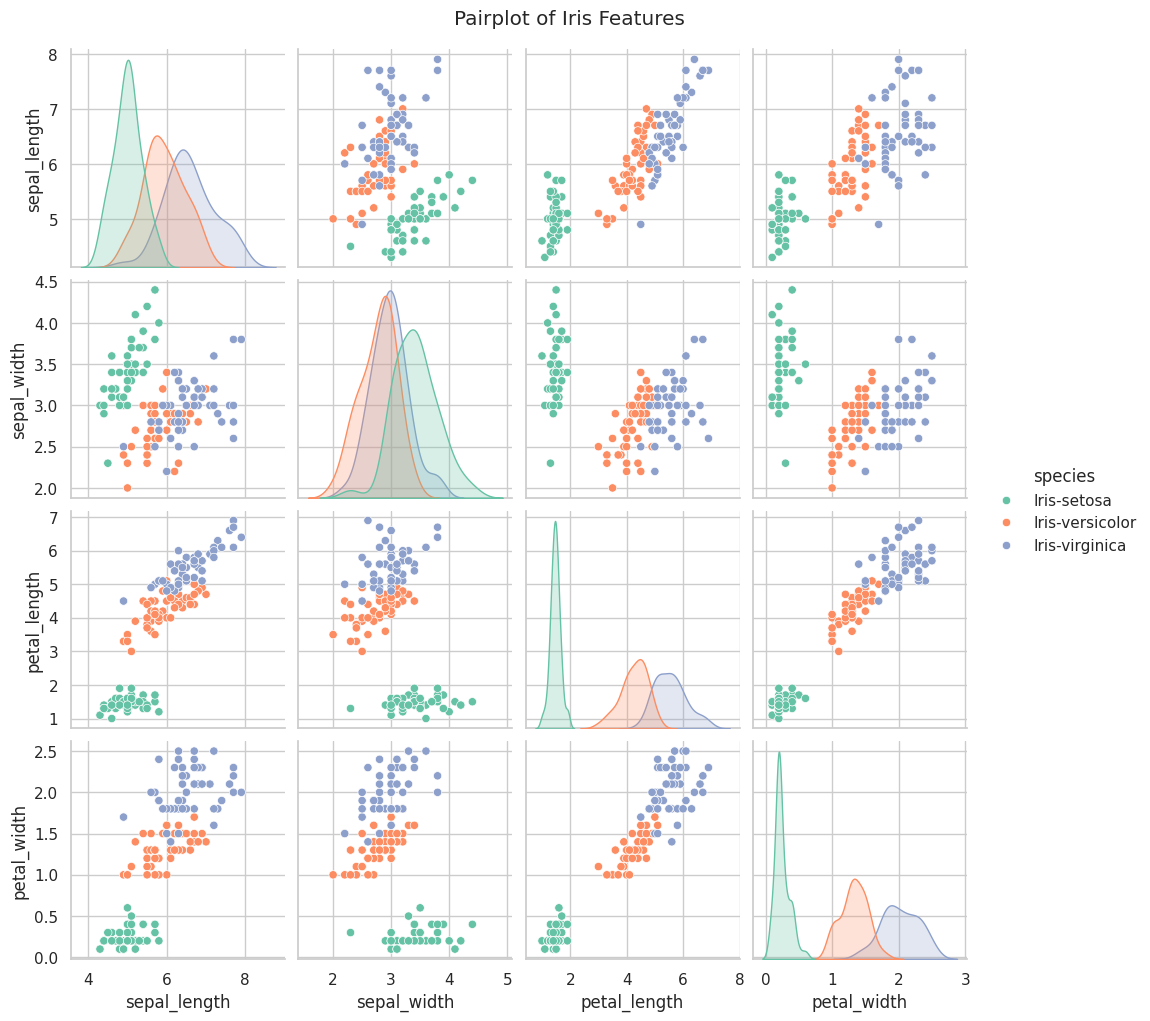

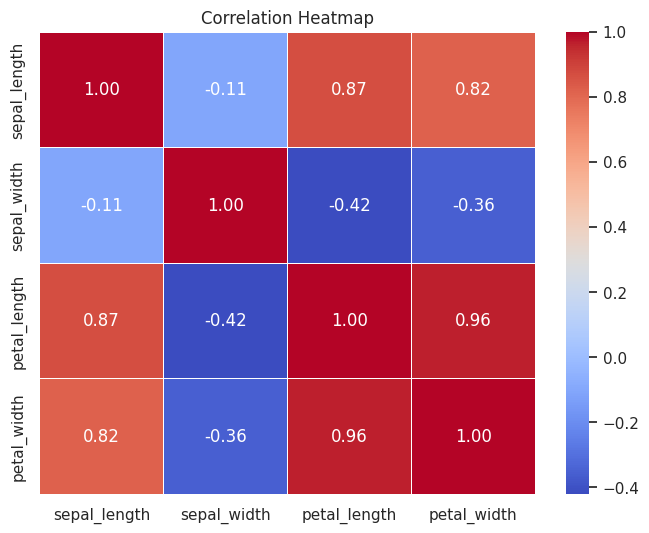

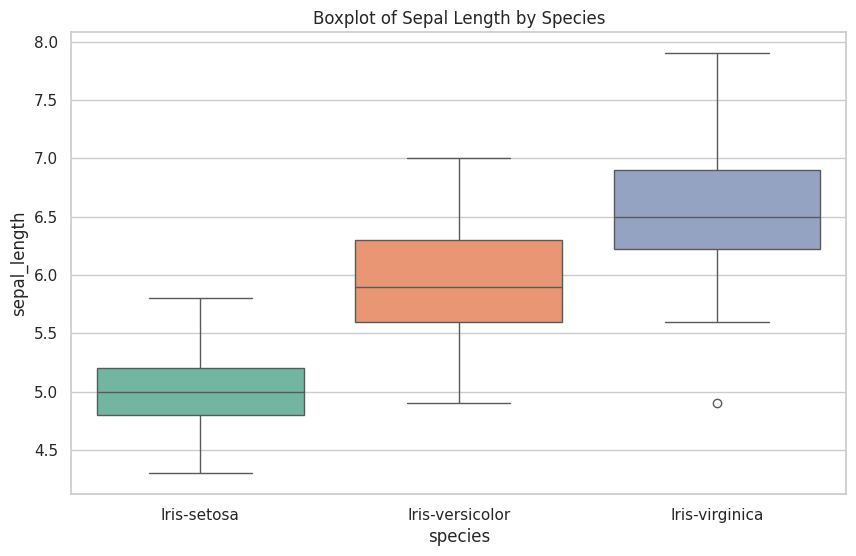

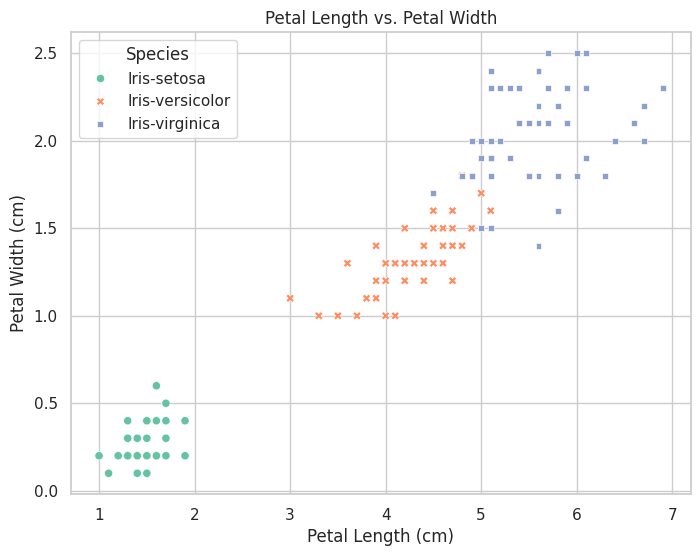

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']
Random Forest Accuracy: 100.00%
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'I

In [ ]:
rrimport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

data=pd.read_csv('IRIS.csv')
print(data.head())

print("Description of dataset")
print(data.describe)

print("Class Distribution")
print(data['species'].value_counts())

print("\nMissing Values in Dataset:")
print(data.isnull().sum())

# Visualization
sns.set(style="whitegrid")

# Pairplot for feature relationships
sns.pairplot(data, hue='species', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(8, 6))
correlation_matrix = data.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for feature distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='species', y='sepal_length', hue='species', dodge=False, palette='Set2', legend=False)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

# Scatterplot for two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data, x='petal_length', y='petal_width', hue='species', style='species', palette='Set2')
plt.title("Petal Length vs. Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.show()

X=data.drop('species',axis=1)
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

"""MODEL 1: Logistic Regression"""

logreg_model = LogisticRegression(random_state=42, max_iter=200)
logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)
print(logreg_predictions)

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Random Forest Accuracy: {logreg_accuracy * 100:.2f}%")

"""MODEL 2: Support Vector Machine"""

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
print(svm_predictions)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

"""MODEL 3: Decision Tree Classifier"""

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Train the model

dt_predictions = dt_model.predict(X_test)
print(dt_predictions)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")